In [63]:
import pandas as pd
import numpy as np

In [64]:
import os
import sys

root_folder = os.path.dirname(os.path.abspath(os.getcwd()))
fetching_data_module_folder = root_folder + "\\fetch_data"
imputed_data_folder = root_folder + "\\data_imputation"
imputed_ndvi_path = imputed_data_folder + "\\ndvi_imputed.csv"
imputed_tracegas_path = imputed_data_folder + "\\tracegas_imputed.csv"
cloud_o3_aai_path = imputed_data_folder + "\\CLOUD_O3_AAI_imputed.csv"

sys.path.insert(0, fetching_data_module_folder)

from fetching_satellite_based import remote_sensing_factor_df

In [65]:
begin_year = 2019
end_year = 2024
atmospheric_factors = ['CLOUD', 'CO', 'HCHO', 'NO2', 'O3', 'SO2', 'AAI']
plant_factor = 'NDVI'

In [66]:
atmospheric_consolidated_df = remote_sensing_factor_df(factor=atmospheric_factors[0], begin=begin_year, end=end_year)

for i in range(1, len(atmospheric_factors)):
    
    factor = atmospheric_factors[i]
    
    factor_df = remote_sensing_factor_df(factor=factor, begin=begin_year, end=end_year)
    
    atmospheric_consolidated_df[factor] = np.array(factor_df[factor])

atmospheric_consolidated_df

,lon,lat,date,ID,CLOUD,CO,HCHO,NO2,O3,SO2,AAI
6570,105.850899,21.021299,2019-01-01,5,1.000000,NaN,NaN,NaN,0.100538,NaN,-1.112399
0,105.741867,21.049749,2019-01-01,19,1.000000,NaN,NaN,NaN,0.100318,NaN,-1.279025
1460,105.948544,21.200344,2019-01-01,51,1.000000,NaN,NaN,NaN,0.101136,NaN,-1.010720
1825,106.288330,21.123247,2019-01-01,52,1.000000,NaN,NaN,NaN,0.099946,NaN,-0.925846
2190,106.111371,21.152745,2019-01-01,53,1.000000,NaN,NaN,NaN,0.100431,NaN,-0.859729
...,...,...,...,...,...,...,...,...,...,...,...
8051,106.314003,20.927000,2024-12-31,172,0.548964,NaN,NaN,NaN,0.114208,NaN,-0.650442
8417,106.430801,20.977400,2024-12-31,173,0.457147,0.04615,NaN,NaN,0.113423,NaN,-0.660913
9149,106.385597,21.116400,2024-12-31,175,0.655623,NaN,NaN,NaN,0.114531,NaN,-0.580081
6587,105.367302,21.338470,2024-12-31,195,1.000000,NaN,NaN,NaN,0.113886,NaN,-0.406657


In [67]:
ndvi_factors = ['NDVI']
ndvi_df = remote_sensing_factor_df(factor='NDVI', begin=2001, end=2021)
imputed_ndvi_df = pd.read_csv(imputed_ndvi_path)

In [68]:
tracegas_factors = ['CO', 'HCHO', 'NO2', 'SO2']
tracegas_df = atmospheric_consolidated_df[tracegas_factors]
imputed_tracegas_df = pd.read_csv(imputed_tracegas_path)

In [69]:
cloud_o3_aai_factors = ['CLOUD', 'O3', 'AAI']
cloud_o3_aai_df = atmospheric_consolidated_df[cloud_o3_aai_factors]
imputed_cloud_o3_aai_df = pd.read_csv(cloud_o3_aai_path)

# Visualization of Data Distributions Before and After Imputation

This notebook compares the probability distributions of various environmental factors before and after data imputation. The visualizations highlight the differences in data distributions and include relevant statistical information.

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

# Set the style for more aesthetically pleasing visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("talk")
sns.set_palette("viridis")

# Define custom colors for different variables
color_palette = {
    'NDVI': '#1f77b4',  # Blue
    'CLOUD': '#ff7f0e',  # Orange
    'O3': '#2ca02c',     # Green
    'AAI': '#d62728',    # Red
    'CO': '#9467bd',     # Purple
    'HCHO': '#8c564b',   # Brown
    'NO2': '#e377c2',    # Pink
    'SO2': '#7f7f7f'     # Gray
}

## NDVI Distribution Comparison

Comparing the distribution of NDVI (Normalized Difference Vegetation Index) values before and after imputation.

In [71]:
def plot_distribution_comparison(before_df, after_df, column, title_prefix="", bins=30):
    # Drop NaN values for analysis
    before_values = before_df[column].dropna()
    after_values = after_df[column].dropna()
    
    # Calculate statistics
    before_stats = {
        'Mean': before_values.mean(),
        'Median': before_values.median(),
        'Std Dev': before_values.std(),
        'Min': before_values.min(),
        'Max': before_values.max()
    }
    
    after_stats = {
        'Mean': after_values.mean(),
        'Median': after_values.median(),
        'Std Dev': after_values.std(),
        'Min': after_values.min(),
        'Max': after_values.max()
    }
    
    # Create figure with GridSpec for better layout control
    fig = plt.figure(figsize=(20, 10))
    gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1, 5])
    
    # Create title for the entire figure
    ax_title = fig.add_subplot(gs[0, :])
    ax_title.set_title(f"{title_prefix}{column} Distribution Comparison Before and After Imputation", fontsize=20, fontweight='bold')
    ax_title.axis('off')
    
    # Create subplot for the before distribution
    ax1 = fig.add_subplot(gs[1, 0])
    before_color = color_palette.get(column, 'blue')
    sns.histplot(before_values, bins=bins, kde=True, ax=ax1, color=before_color, alpha=0.7)
    ax1.set_title(f"Before Imputation", fontsize=16)
    ax1.set_xlabel(f"{column} Value", fontsize=14)
    ax1.set_ylabel("Frequency", fontsize=14)
    ax1.grid(True, alpha=0.3)
    
    # Add a box with statistics for before data
    stats_text = "\n".join([f"{k}: {v:.4f}" for k, v in before_stats.items()])
    props = dict(boxstyle='round', facecolor='white', alpha=0.8)
    ax1.text(0.05, 0.95, stats_text, transform=ax1.transAxes, fontsize=12,
            verticalalignment='top', bbox=props)
    
    # Create subplot for the after distribution
    ax2 = fig.add_subplot(gs[1, 1], sharey=ax1)
    after_color = color_palette.get(column, 'green')
    sns.histplot(after_values, bins=bins, kde=True, ax=ax2, color=after_color, alpha=0.7)
    ax2.set_title(f"After Imputation", fontsize=16)
    ax2.set_xlabel(f"{column} Value", fontsize=14)
    ax2.set_ylabel("", fontsize=14)
    ax2.grid(True, alpha=0.3)
    
    # Add a box with statistics for after data
    stats_text = "\n".join([f"{k}: {v:.4f}" for k, v in after_stats.items()])
    ax2.text(0.05, 0.95, stats_text, transform=ax2.transAxes, fontsize=12,
            verticalalignment='top', bbox=props)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9, hspace=0.3)
    plt.show()
    
    return fig

c:\Application\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Application\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Application\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


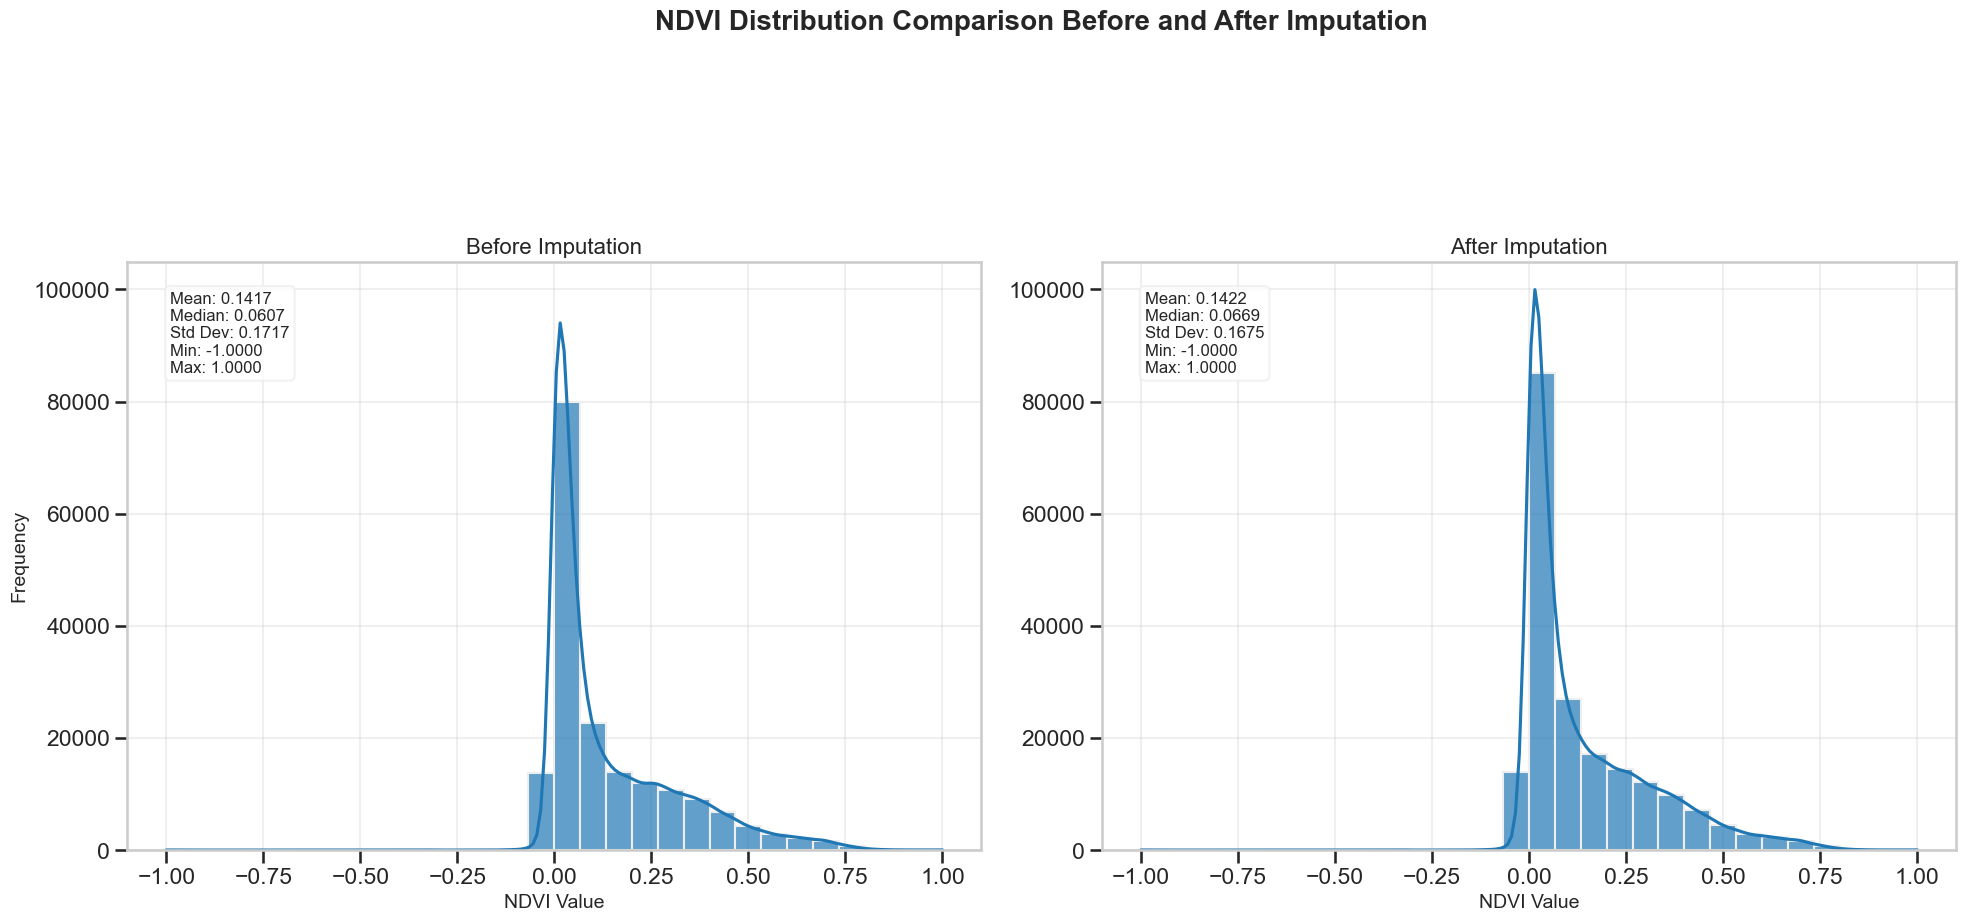

In [72]:
# Visualize NDVI distribution before and after imputation
ndvi_fig = plot_distribution_comparison(ndvi_df, imputed_ndvi_df, 'NDVI')

## Visualization of Trace Gas Distributions

Comparing the distributions of various trace gases (CO, HCHO, NO2, SO2) before and after imputation with overlaid plots for better comparison.

In [73]:
# Function to visualize trace gases with overlaid distributions
def plot_overlaid_trace_gas_distributions(before_df, after_df, factors, title="Trace Gas Distributions Before and After Imputation"):
    n_factors = len(factors)
    fig = plt.figure(figsize=(20, 5 * n_factors))
    
    # Add overall title
    fig.suptitle(title, fontsize=22, fontweight='bold', y=0.98)
    
    # Define light gray color for imputed data to avoid color overlay
    imputed_color = '#95a5a6'  # Light gray that won't overpower the original colors
    
    for i, factor in enumerate(factors):
        # Get data
        before_values = before_df[factor].dropna()
        # Ensure after_df has the same column
        if factor in after_df.columns:
            after_values = after_df[factor].dropna()
        else:
            print(f"Warning: {factor} not found in after_df")
            continue
            
        # Calculate statistics
        before_stats = {
            'Mean': before_values.mean(),
            'Median': before_values.median(),
            'Std Dev': before_values.std(),
            'Min': before_values.min(),
            'Max': before_values.max()
        }
        
        after_stats = {
            'Mean': after_values.mean(),
            'Median': after_values.median(),
            'Std Dev': after_values.std(),
            'Min': after_values.min(),
            'Max': after_values.max()
        }
        
        # Create subplot for the overlaid distributions
        ax = plt.subplot(n_factors, 1, i+1)
        
        # Plot both distributions on the same axis
        factor_color = color_palette.get(factor, 'blue')
        
        # Determine common bins for both distributions
        min_val = min(before_values.min(), after_values.min())
        max_val = max(before_values.max(), after_values.max())
        bins = np.linspace(min_val, max_val, 30)
        
        # Plot histograms with KDE
        sns.histplot(before_values, bins=bins, kde=True, ax=ax, color=factor_color, 
                    alpha=0.4, label="Before Imputation")
        sns.histplot(after_values, bins=bins, kde=True, ax=ax, color=imputed_color, 
                    alpha=0.4, label="After Imputation")
        
        # Customize the plot
        ax.set_title(f"{factor} Distribution: Before vs After Imputation", fontsize=16)
        ax.set_xlabel(f"{factor} Value", fontsize=14)
        ax.set_ylabel("Frequency", fontsize=14)
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=12)
        
        # Add statistics boxes
        before_stats_text = "Before Imputation:\n" + "\n".join([f"{k}: {v:.6f}" for k, v in before_stats.items()])
        after_stats_text = "After Imputation:\n" + "\n".join([f"{k}: {v:.6f}" for k, v in after_stats.items()])
        
        props = dict(boxstyle='round', facecolor='white', alpha=0.8)
        ax.text(0.02, 0.95, before_stats_text, transform=ax.transAxes, fontsize=12,
                verticalalignment='top', bbox=props)
        
        ax.text(0.72, 0.95, after_stats_text, transform=ax.transAxes, fontsize=12,
                verticalalignment='top', bbox=props)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.95, hspace=0.3)
    plt.show()
    
    return fig

c:\Application\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Application\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Application\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Application\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

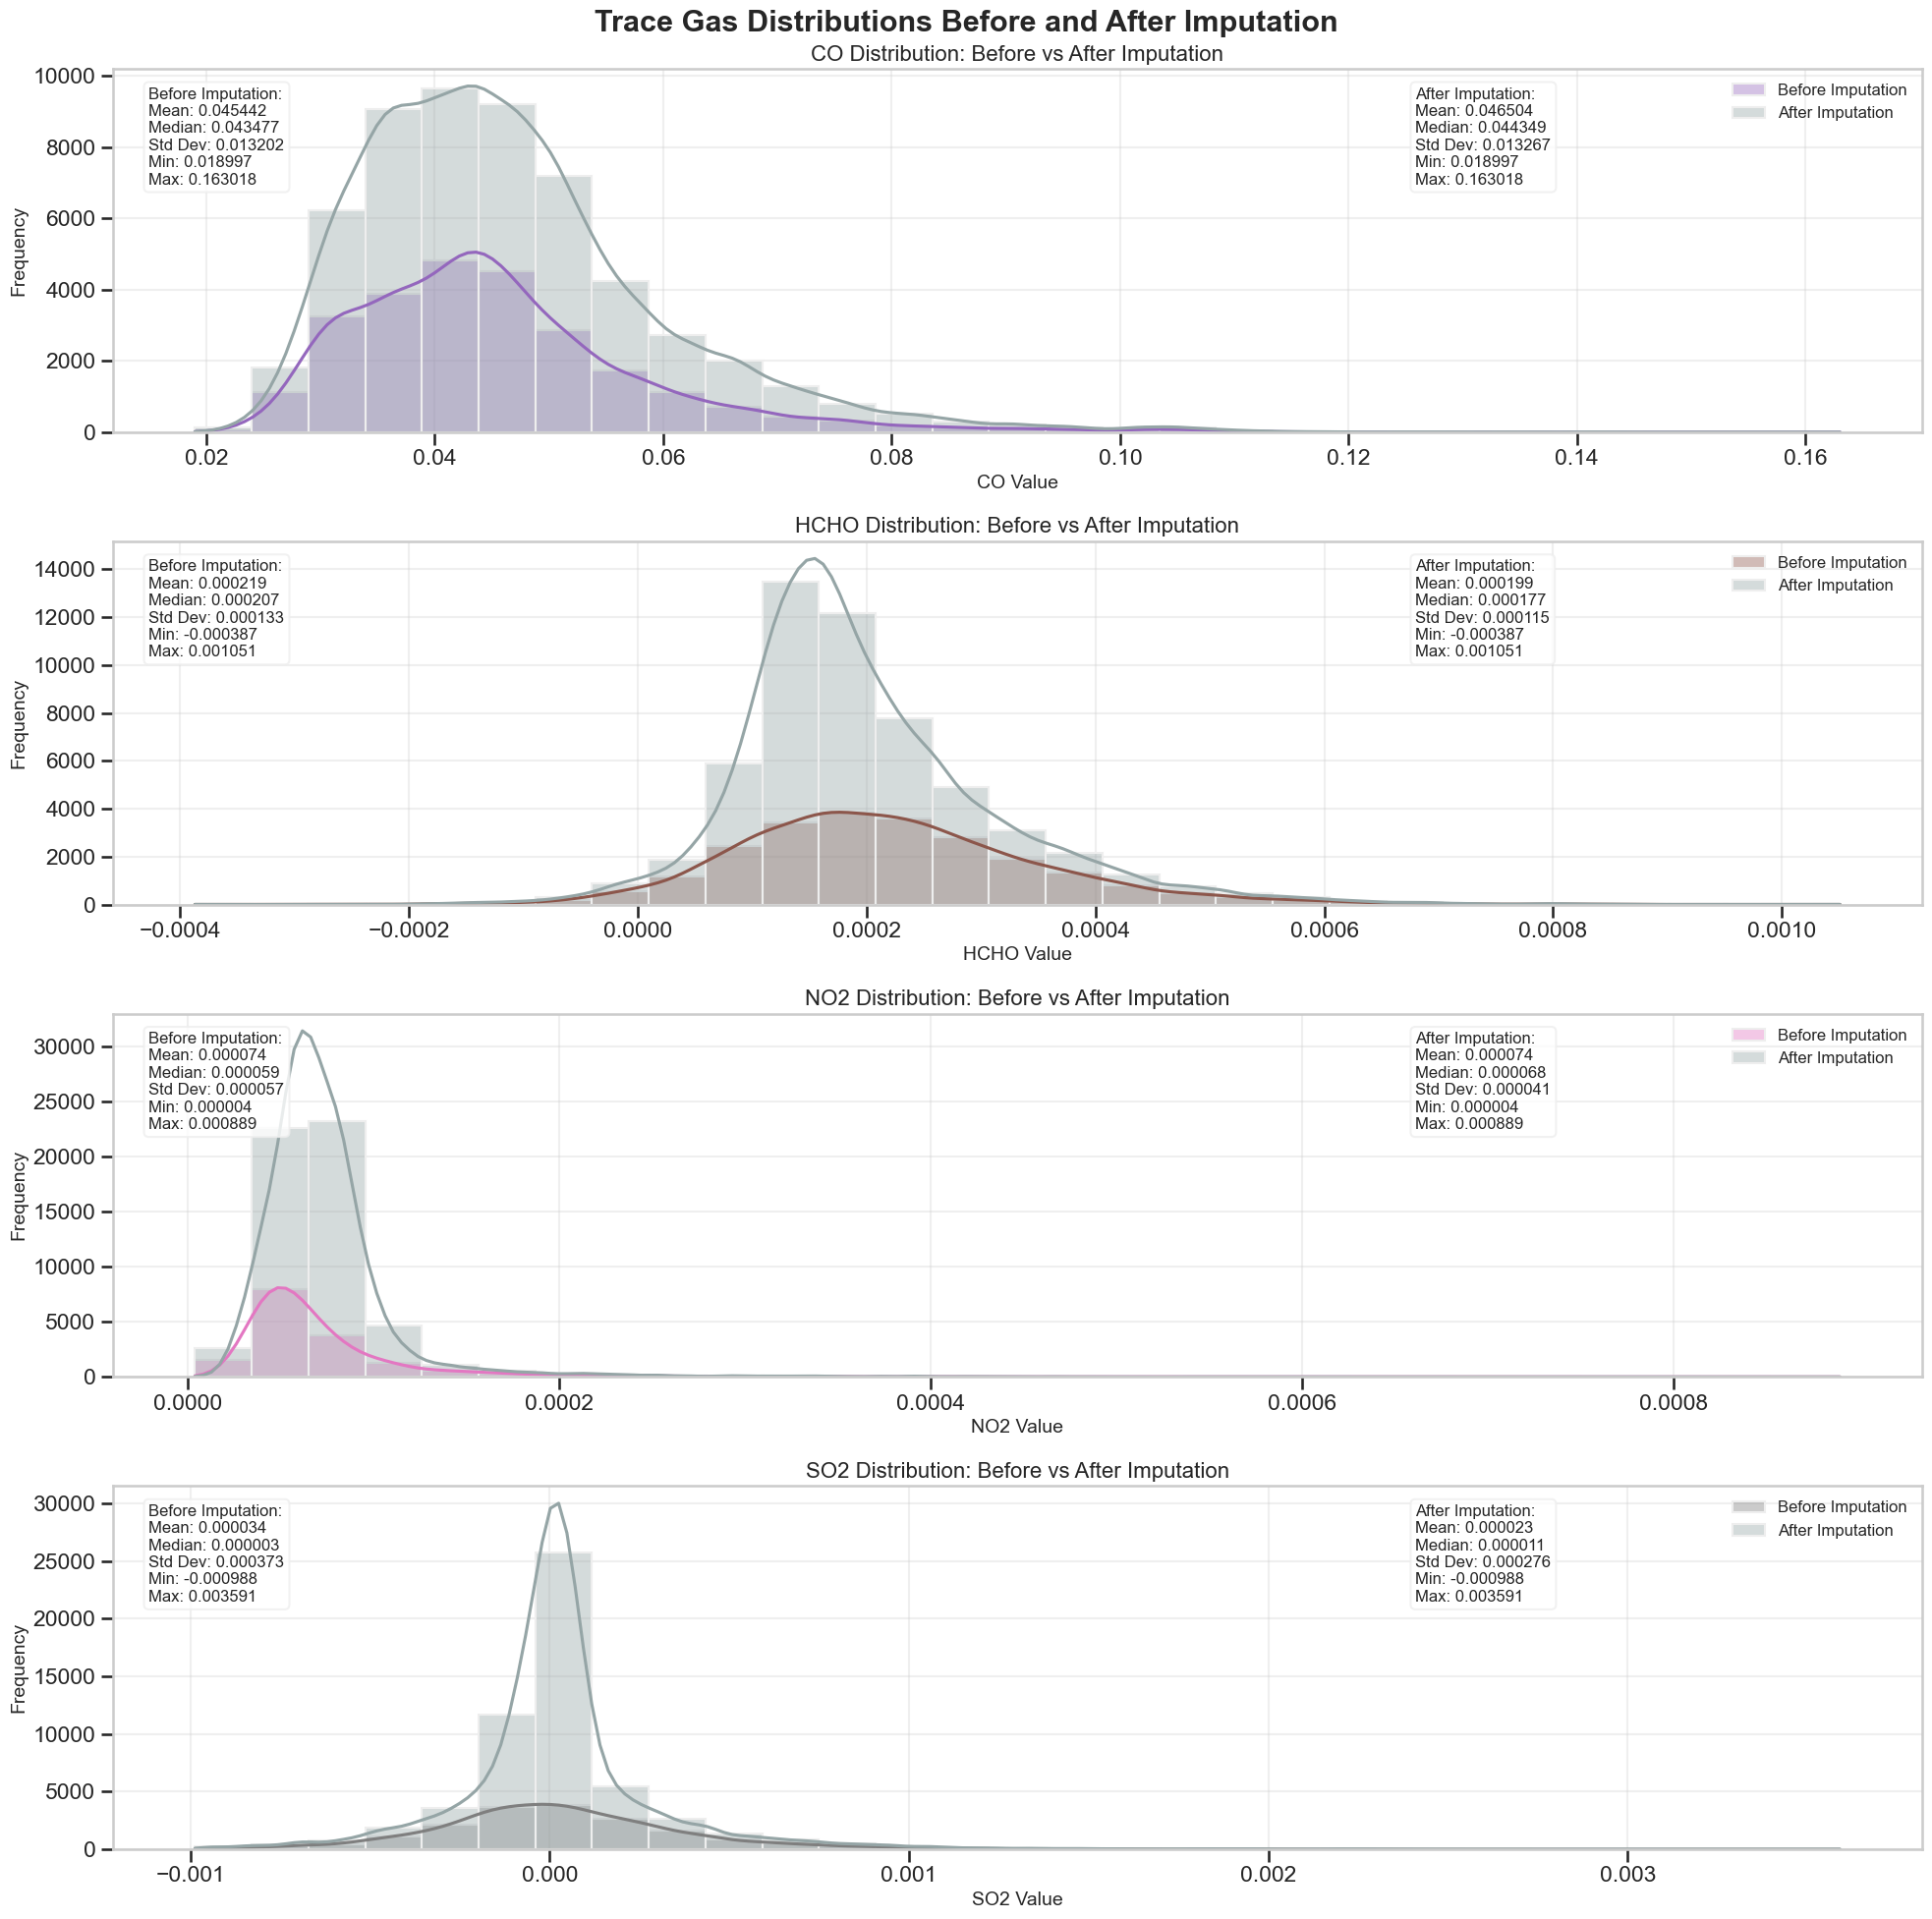

In [74]:
# Visualize trace gas distributions with overlaid plots for better comparison
tracegas_fig = plot_overlaid_trace_gas_distributions(tracegas_df, imputed_tracegas_df, tracegas_factors)

## Cloud, O3, and AAI Distributions

Comparing the distributions of CLOUD, O3, and AAI before and after imputation.

In [75]:
# Function to visualize Cloud, O3, and AAI in a grid without Q-Q plots
def plot_cloud_o3_aai_comparison(before_df, after_df, factors, title="CLOUD, O3, and AAI Distributions Before and After Imputation"):
    n_factors = len(factors)
    fig = plt.figure(figsize=(20, 5 * n_factors))
    gs = gridspec.GridSpec(n_factors, 2, width_ratios=[1, 1])
    
    # Add overall title
    fig.suptitle(title, fontsize=22, fontweight='bold', y=0.98)
    
    for i, factor in enumerate(factors):
        # Get data
        before_values = before_df[factor].dropna()
        # Ensure after_df has the same column
        if factor in after_df.columns:
            after_values = after_df[factor].dropna()
        else:
            print(f"Warning: {factor} not found in after_df")
            continue
            
        # Calculate statistics
        before_stats = {
            'Mean': before_values.mean(),
            'Median': before_values.median(),
            'Std Dev': before_values.std(),
            'Min': before_values.min(),
            'Max': before_values.max()
        }
        
        after_stats = {
            'Mean': after_values.mean(),
            'Median': after_values.median(),
            'Std Dev': after_values.std(),
            'Min': after_values.min(),
            'Max': after_values.max()
        }
        
        # Plot before distribution
        ax1 = fig.add_subplot(gs[i, 0])
        factor_color = color_palette.get(factor, 'blue')
        sns.histplot(before_values, bins=30, kde=True, ax=ax1, color=factor_color, alpha=0.7)
        ax1.set_title(f"{factor} Before Imputation", fontsize=16)
        ax1.set_xlabel(f"{factor} Value", fontsize=14)
        ax1.set_ylabel("Frequency", fontsize=14)
        ax1.grid(True, alpha=0.3)
        
        # Add statistics for before data
        stats_text = "\n".join([f"{k}: {v:.6f}" for k, v in before_stats.items()])
        props = dict(boxstyle='round', facecolor='white', alpha=0.8)
        ax1.text(0.05, 0.95, stats_text, transform=ax1.transAxes, fontsize=12,
                verticalalignment='top', bbox=props)
        
        # Plot after distribution
        ax2 = fig.add_subplot(gs[i, 1], sharey=ax1)
        after_color = color_palette.get(factor, 'green')
        sns.histplot(after_values, bins=30, kde=True, ax=ax2, color=after_color, alpha=0.7)
        ax2.set_title(f"{factor} After Imputation", fontsize=16)
        ax2.set_xlabel(f"{factor} Value", fontsize=14)
        ax2.set_ylabel("", fontsize=14)
        ax2.grid(True, alpha=0.3)
        
        # Add statistics for after data
        stats_text = "\n".join([f"{k}: {v:.6f}" for k, v in after_stats.items()])
        ax2.text(0.05, 0.95, stats_text, transform=ax2.transAxes, fontsize=12,
                verticalalignment='top', bbox=props)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.95, hspace=0.4)
    plt.show()
    
    return fig

c:\Application\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Application\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Application\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Application\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

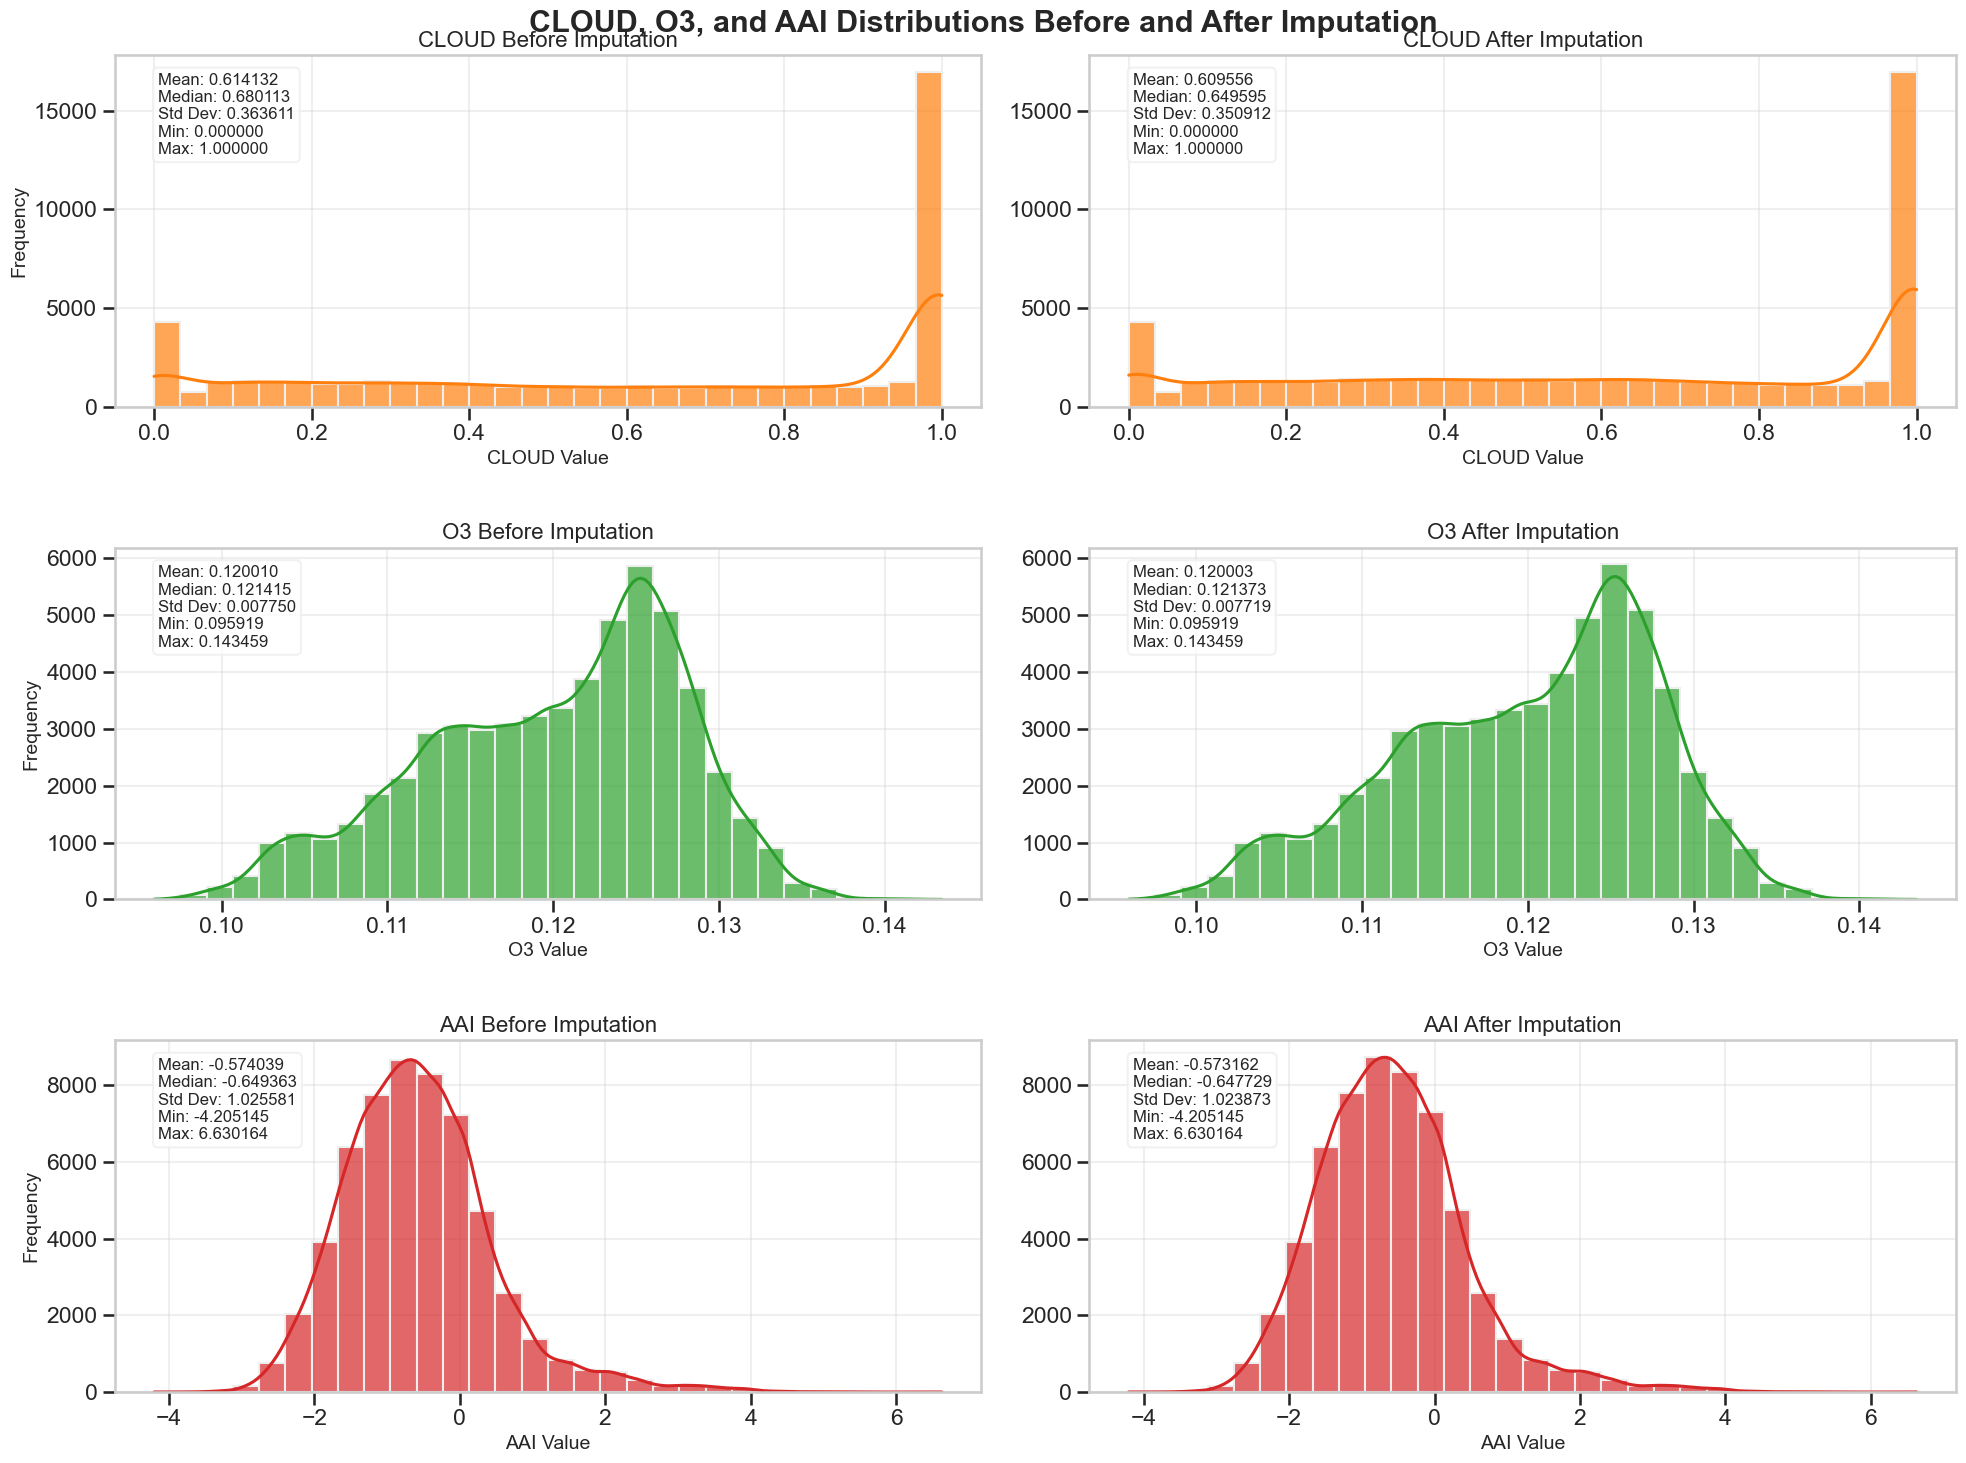

In [76]:
# Visualize CLOUD, O3, and AAI distributions using the new function without Q-Q plots
cloud_o3_aai_fig = plot_cloud_o3_aai_comparison(cloud_o3_aai_df, imputed_cloud_o3_aai_df, cloud_o3_aai_factors, 
                                          title="CLOUD, O3, and AAI Distributions Before and After Imputation")

## Pair Plots of Environmental Variables

Visualizing the relationships between different environmental variables before and after imputation.

In [77]:
def create_pairplot(df, title="Relationships Between Environmental Variables", sample_size=10000):
    # Sample the data if it's too large
    if len(df) > sample_size:
        df_sample = df.sample(sample_size, random_state=42)
    else:
        df_sample = df
        
    # Create the pairplot
    g = sns.pairplot(df_sample, diag_kind='kde', plot_kws={'alpha': 0.6, 's': 30, 'edgecolor': 'k'})
    
    # Add title
    g.fig.suptitle(title, y=1.02, fontsize=18, fontweight='bold')
    g.fig.tight_layout()
    
    return g

c:\Application\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Application\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Application\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Application\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

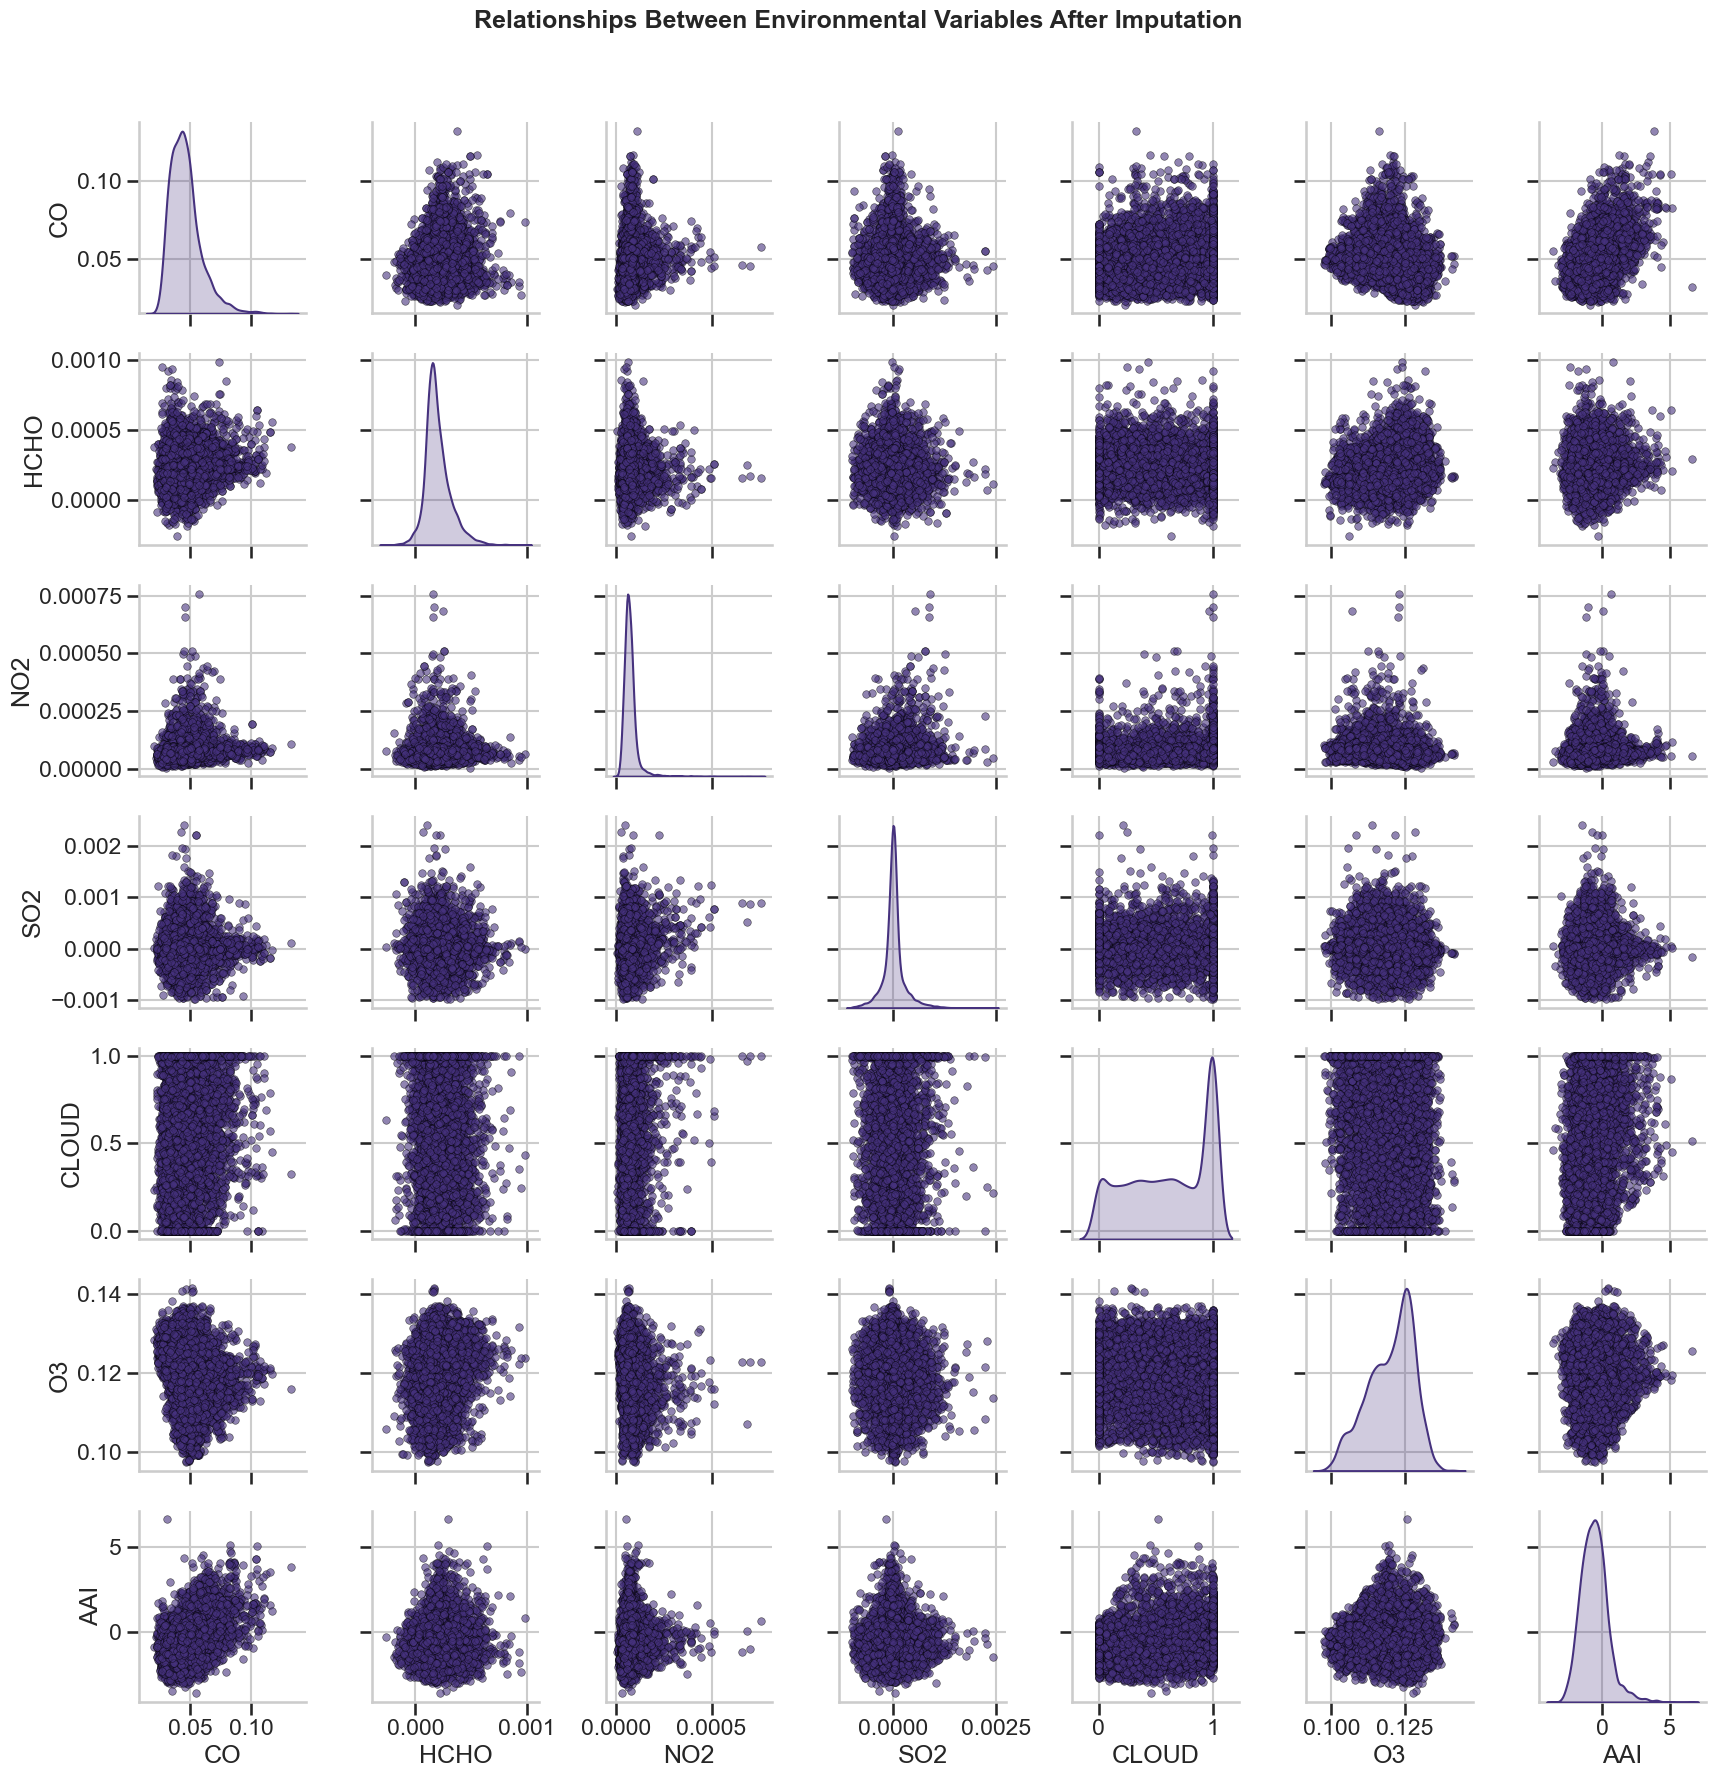

In [78]:
# Creating pair plots for the trace gases after imputation
# First, prepare a combined dataframe with all factors
try:
    # Extract relevant columns from imputed datasets
    imputed_combined = pd.DataFrame()
    for factor in tracegas_factors:
        if factor in imputed_tracegas_df.columns:
            imputed_combined[factor] = imputed_tracegas_df[factor]
            
    for factor in cloud_o3_aai_factors:
        if factor in imputed_cloud_o3_aai_df.columns:
            imputed_combined[factor] = imputed_cloud_o3_aai_df[factor]
    
    # Create the pairplot for imputed data
    if not imputed_combined.empty:
        pairplot_imputed = create_pairplot(imputed_combined, 
                                          title="Relationships Between Environmental Variables After Imputation")
except Exception as e:
    print(f"Error creating pairplot: {e}")